
# Day 1 — Numpy & Linear Algebra Basics

**Goal:** Practice core linear algebra operations with NumPy (vectors, matrices, dot product, matrix multiplication, norms, cosine similarity) and build the geometric intuition required for ML/DL.

> 💡 Tip (نصيحة): الجبر الخطي هو لغة البيانات في الذكاء الاصطناعي — كل شيء تقريبًا يتحول إلى عمليات على متجهات ومصفوفات.


## 1) Setup

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=4)
print("NumPy:", np.__version__)


NumPy: 2.0.2



## 2) Core Concepts (مختصر نظري)
- **Vector (متجه):** ordered list of numbers. Example: a 3D point `[x, y, z]` or an image flattened to a long vector.
- **Matrix (مصفوفة):** 2D table of numbers; can represent datasets or weight matrices in neural nets.
- **Dot product:** similarity/interaction between two vectors.
- **Matrix multiplication:** composition/combination of linear transformations; core of forward pass in NNs.
- **Transpose (ᵀ):** rows ↔ columns.
- **Norm (∥v∥):** length/magnitude of a vector.
- **Cosine similarity:** angle-based similarity (useful in NLP/retrieval).


## 3) Vectors — sum, dot, norms, cosine similarity

In [ ]:

# Define two vectors
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Addition
sum_v = v1 + v2

# Dot product
dot = np.dot(v1, v2)

# Norms
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)

# Cosine similarity
cos_sim = dot / (norm_v1 * norm_v2)

print("v1:", v1)
print("v2:", v2)
print("Sum:", sum_v)
print("Dot:", dot)
print("||v1||:", norm_v1, "||v2||:", norm_v2)
print("Cosine similarity:", cos_sim)


v1: [1 2 3]
v2: [4 5 6]
Sum: [5 7 9]
Dot: 32
||v1||: 3.7416573867739413 ||v2||: 8.774964387392123
Cosine similarity: 0.9746318461970762


### Optional: Visualize two 2D vectors (اختياري)

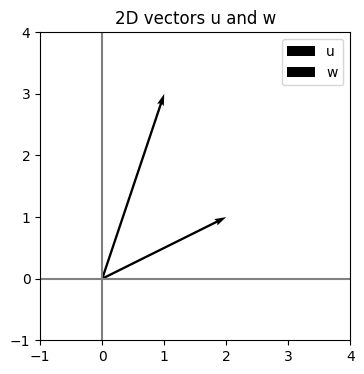

In [ ]:

# Visualize two 2D vectors
u = np.array([2, 1])
w = np.array([1, 3])

plt.figure(figsize=(4,4))
plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, label='u')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, label='w')
plt.xlim(-1, 4); plt.ylim(-1, 4)
plt.axhline(0, color='gray'); plt.axvline(0, color='gray')
plt.legend()
plt.title("2D vectors u and w")
plt.show()


## 4) Matrices — transpose & multiplication

In [ ]:

A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

AT = A.T
AB = A @ B           # same as np.matmul(A, B)

print("A =\n", A)
print("B =\n", B)
print("A^T =\n", AT)
print("A @ B =\n", AB)


A =
 [[1 2]
 [3 4]]
B =
 [[5 6]
 [7 8]]
A^T =
 [[1 3]
 [2 4]]
A @ B =
 [[19 22]
 [43 50]]


## 5) Practical example — student grades (مثال عملي درجات الطلاب)

In [ ]:

# Rows: students, Cols: courses
grades = np.array([
    [92, 85, 77, 90],  # student 1
    [70, 88, 82, 75],  # student 2
    [85, 95, 91, 89],  # student 3
], dtype=float)

student_means = grades.mean(axis=1)  # average per student
course_means  = grades.mean(axis=0)  # average per course

print("Grades:\n", grades)
print("Avg per student:", student_means)
print("Avg per course:", course_means)


Grades:
 [[92. 85. 77. 90.]
 [70. 88. 82. 75.]
 [85. 95. 91. 89.]]
Avg per student: [86.   78.75 90.  ]
Avg per course: [82.3333 89.3333 83.3333 84.6667]


## 6) Utility functions

In [ ]:

def cosine_similarity(a: np.ndarray, b: np.ndarray) -> float:
    """Compute cosine similarity between 1D vectors a and b."""
    a = np.asarray(a).ravel()
    b = np.asarray(b).ravel()
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    return float(np.dot(a, b) / denom) if denom != 0 else 0.0

def pairwise_cosine(X: np.ndarray):
    """Return pairwise cosine similarity matrix for 2D array X (rows = vectors)."""
    X = np.asarray(X, dtype=float)
    n = X.shape[0]
    M = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            M[i, j] = cosine_similarity(X[i], X[j])
    return M

# quick test
X = np.random.randn(4, 5)
print("Pairwise cosine similarity:\n", pairwise_cosine(X))


Pairwise cosine similarity:
 [[ 1.     -0.0117 -0.3825  0.1934]
 [-0.0117  1.      0.5445 -0.4505]
 [-0.3825  0.5445  1.     -0.8456]
 [ 0.1934 -0.4505 -0.8456  1.    ]]



## 7) Exercises (تمارين)
1. Create **3 random vectors** (size 5). Compute their **norms** and the **cosine similarity** between each pair.  
2. Create **two random 3×3 matrices**. Compute the **matrix multiplication** and the **transpose** of the first matrix.  
3. Build a function `rowwise_zscore(X)` that standardizes each row (subtract mean and divide by std). Test it on a random matrix.  
4. (Challenge) Given three 2D vectors, **plot** them and sort them by **angle** relative to the x-axis.


### Hints / Starter code (تلميحات)

In [ ]:

# Q1
V = np.random.randn(3, 5)
norms = np.linalg.norm(V, axis=1)
S = pairwise_cosine(V)
print("Vectors:\n", V)
print("Norms:", norms)
print("Cosine similarity matrix:\n", S)

# Q2
A = np.random.randn(3, 3)
B = np.random.randn(3, 3)
print("\nA @ B =\n", A @ B)
print("A^T =\n", A.T)

# Q3
def rowwise_zscore(X: np.ndarray):
    X = np.asarray(X, dtype=float)
    mu = X.mean(axis=1, keepdims=True)
    sigma = X.std(axis=1, keepdims=True)
    sigma[sigma == 0] = 1.0
    return (X - mu) / sigma

X = np.random.randn(4, 6)
print("\nRowwise z-score example:\n", rowwise_zscore(X))


Vectors:
 [[ 1.0359 -1.5758 -0.5494 -1.532   0.5301]
 [ 0.0601  0.6312  1.623  -0.1221 -0.0197]
 [ 1.0677  1.1611 -0.2505 -0.8339 -1.5783]]
Norms: [2.5468 1.7468 2.3953]
Cosine similarity matrix:
 [[ 1.     -0.3703 -0.0238]
 [-0.3703  1.      0.1251]
 [-0.0238  0.1251  1.    ]]

A @ B =
 [[ 1.2548  0.3197 -0.326 ]
 [-1.3291 -0.3682 -2.6143]
 [ 2.6582  0.7396  0.2581]]
A^T =
 [[-0.5109  0.2572 -0.9492]
 [ 0.5623  1.6358  0.455 ]
 [-0.6518  0.7611 -1.4481]]

Rowwise z-score example:
 [[-1.2461  0.0618  1.4215  1.0696 -0.1924 -1.1144]
 [ 0.3158  0.8515 -0.9568  1.6117 -0.8821 -0.9401]
 [-0.1709  1.3031  0.2207  0.8949 -0.4541 -1.7936]
 [ 0.5456 -1.2485  0.5955 -1.1783  1.53   -0.2444]]


In [ ]:
# Q1

import numpy as np

V = np.random.randn(3, 5)

norms = np.linalg.norm(V, axis=1)

def cosine_similarity(a, b):
    num = np.dot(a, b)
    den = np.linalg.norm(a) * np.linalg.norm(b)
    return float(num / den) if den != 0 else 0.0

S = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        S[i, j] = cosine_similarity(V[i], V[j])

print("Vectors:\n", V)
print("Norms:", norms)
print("Pairwise cosine:\n", S)


Vectors:
 [[-1.8548  1.47    0.0004  0.3593 -1.5113]
 [ 1.8087  1.6783  2.0697  0.1187 -0.4751]
 [ 0.3062  0.3288  1.2497 -0.042  -0.8015]]
Norms: [2.8309 3.2575 1.5517]
Pairwise cosine:
 [[ 1.     -0.0137  0.2532]
 [-0.0137  1.      0.8048]
 [ 0.2532  0.8048  1.    ]]


In [ ]:
A = np.random.randn(3, 3)
B = np.random.randn(3, 3)

AB = A @ B           # matrix multiplication
AT = A.T             # transpose

print("A:\n", A)
print("B:\n", B)
print("A @ B:\n", AB)
print("A^T:\n", AT)


A:
 [[ 1.4124  0.3526  0.6907]
 [-0.0241 -1.1047 -1.3469]
 [-0.5032  0.1811  0.3333]]
B:
 [[-0.1907 -0.2757  1.0407]
 [-0.2296 -0.8226 -1.2574]
 [ 1.2084 -0.9871  0.3943]]
A @ B:
 [[ 0.4843 -1.3613  1.2988]
 [-1.3694  2.245   0.8329]
 [ 0.4571 -0.3392 -0.6201]]
A^T:
 [[ 1.4124 -0.0241 -0.5032]
 [ 0.3526 -1.1047  0.1811]
 [ 0.6907 -1.3469  0.3333]]


In [ ]:
def rowwise_zscore(X: np.ndarray):
    X = np.asarray(X, dtype=float)
    mu = X.mean(axis=1, keepdims=True)
    sigma = X.std(axis=1, keepdims=True)
    sigma[sigma == 0] = 1.0
    return (X - mu) / sigma


X = np.random.randn(4, 6)
Z = rowwise_zscore(X)

print("X:\n", X)
print("Row-wise z-score:\n", Z)
print("Row means (≈0):", Z.mean(axis=1))
print("Row stds (≈1): ", Z.std(axis=1))


X:
 [[-1.0194  0.7197 -0.2501  1.1048  1.2217  1.1669]
 [ 0.0384  0.3575 -0.1804 -0.8709 -0.7887 -1.2833]
 [-0.0855  0.9602 -0.7502  1.0735 -0.538  -1.3878]
 [ 0.2843 -0.2429  2.0343  0.5109 -0.1354  0.6721]]
Row-wise z-score:
 [[-1.7941  0.2722 -0.88    0.7298  0.8686  0.8035]
 [ 0.8648  1.4247  0.481  -0.7304 -0.5862 -1.4539]
 [ 0.0401  1.2127 -0.7052  1.3398 -0.4673 -1.4202]
 [-0.3146 -1.0166  2.0158 -0.0128 -0.8736  0.2018]]
Row means (≈0): [ 0. -0.  0.  0.]
Row stds (≈1):  [1. 1. 1. 1.]


Vectors (unsorted):
 [[ 2.  1.]
 [ 1.  3.]
 [-1.  2.]]
Angles (deg, sorted): [ 26.5651  71.5651 116.5651]
Vectors (sorted by angle):
 [[ 2.  1.]
 [ 1.  3.]
 [-1.  2.]]


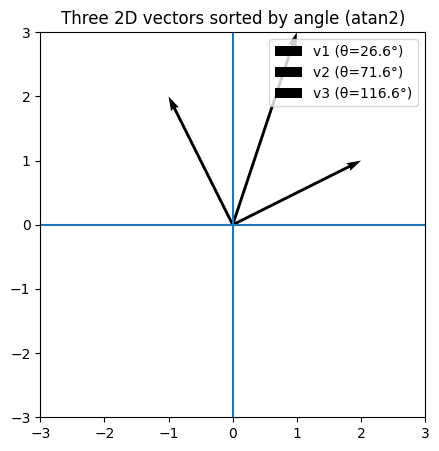

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

U = np.array([
    [2.0,  1.0],
    [1.0,  3.0],
    [-1.0, 2.0]
])

# Angle relative to x-axis: atan2(y, x)
angles = np.arctan2(U[:,1], U[:,0])   # in radians, range [-pi, pi]
order = np.argsort(angles)            # ascending by angle
U_sorted = U[order]
angles_deg = np.degrees(angles[order])

print("Vectors (unsorted):\n", U)
print("Angles (deg, sorted):", angles_deg)
print("Vectors (sorted by angle):\n", U_sorted)

# Plot
plt.figure(figsize=(5,5))
for i, (x, y) in enumerate(U_sorted):
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, label=f"v{i+1} (θ={angles_deg[i]:.1f}°)")

plt.xlim(-3, 3); plt.ylim(-3, 3)
plt.axhline(0); plt.axvline(0)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Three 2D vectors sorted by angle (atan2)")
plt.legend()
plt.show()



## 8) Wrap-up (الخلاصة)
- Data ⇢ vectors & matrices.  
- Learning ⇢ mostly **matrix multiplications** + **nonlinearities**.  
- Today you used NumPy to manipulate vectors/matrices and computed norms & cosine similarity.

**Next (غدًا):** Probability & Statistics with NumPy/Matplotlib (distributions, mean, variance, sampling).
